>### PyTorch Fashion
1. Prepare dataset
2. Design Model (Using Class)
3. Construct loss and optimizer
4. Training Cycle - forward backward update

>### Linear Regression

>#### 1. Prepare Dataset
在原先的题设中，$x,\widehat y \in R$\
在pytorch中，若使用mini-batch的算法，一次性求出一个批量的$\widehat y$，则需要$x$以及$\widehat y$作为矩阵参与计算，此时利用其广播机制，可以将原标量参数$\omega$扩写为同维度的矩阵$[w]$,参与运算而不改变其Tensor的性质。\
对于矩阵，行表示样本，列表示特征

In [2]:
import torch

# 作为矩阵参与运算
x_data = torch.Tensor([[1.0],[2.0],[3.0]])
y_data = torch.Tensor([[2.0],[4.0],[6.0]])

>#### 2. Design Model
- 重点在构造计算图
  
- 在如下线性模型的计算图中，红框区域为线性单元，其中的$\omega$以及$b$是需要反复训练确定的，在设计时，需要率先设计出此二者的维度。
    而由于公式
    $$
    \widehat y = \omega x +b
    $$
    因此，只要确定了$\widehat y $以及$x$的维度，就可以确定上述两个量的维度大小。
    <image>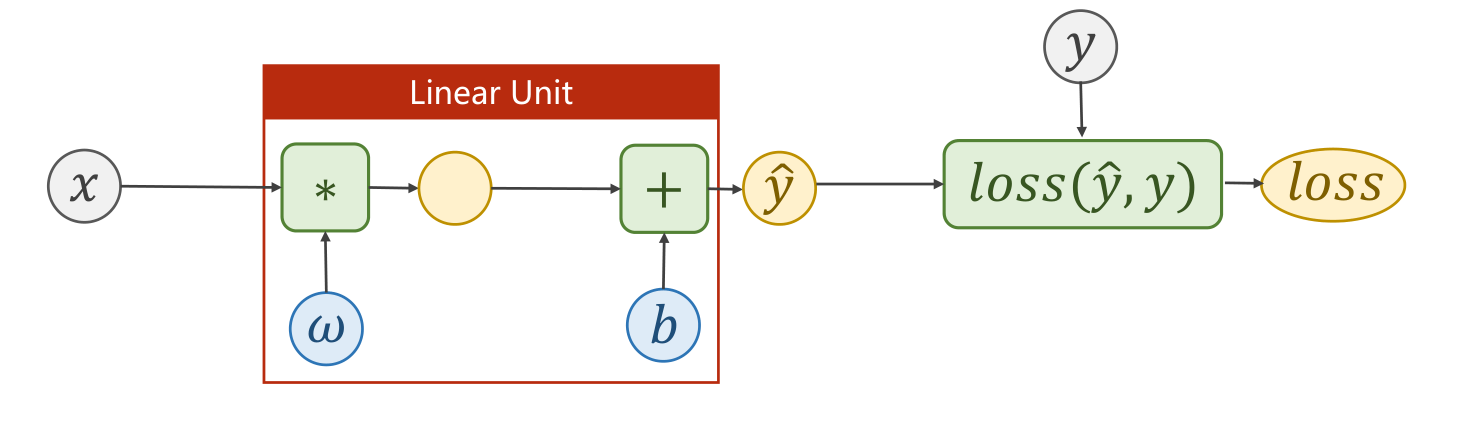</image>

- 按照上述理论，由于前边的计算过程都是针对矩阵的，因此最后的$loss$也是矩阵，但由于要进行反向传播调整参数，因此$loss$应当是个标量，因此要对矩阵$[loss]$内的每个量求和求均值(MSE)。
  $loss = \frac{1}{N}\Sigma
\begin{bmatrix}
{loss_1}\\
{\vdots}\\
{loss_n}\\
\end{bmatrix}$

In [4]:
class LinearModel(torch.nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.linear = torch.nn.Linear(1,1)
    
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

model = LinearModel()

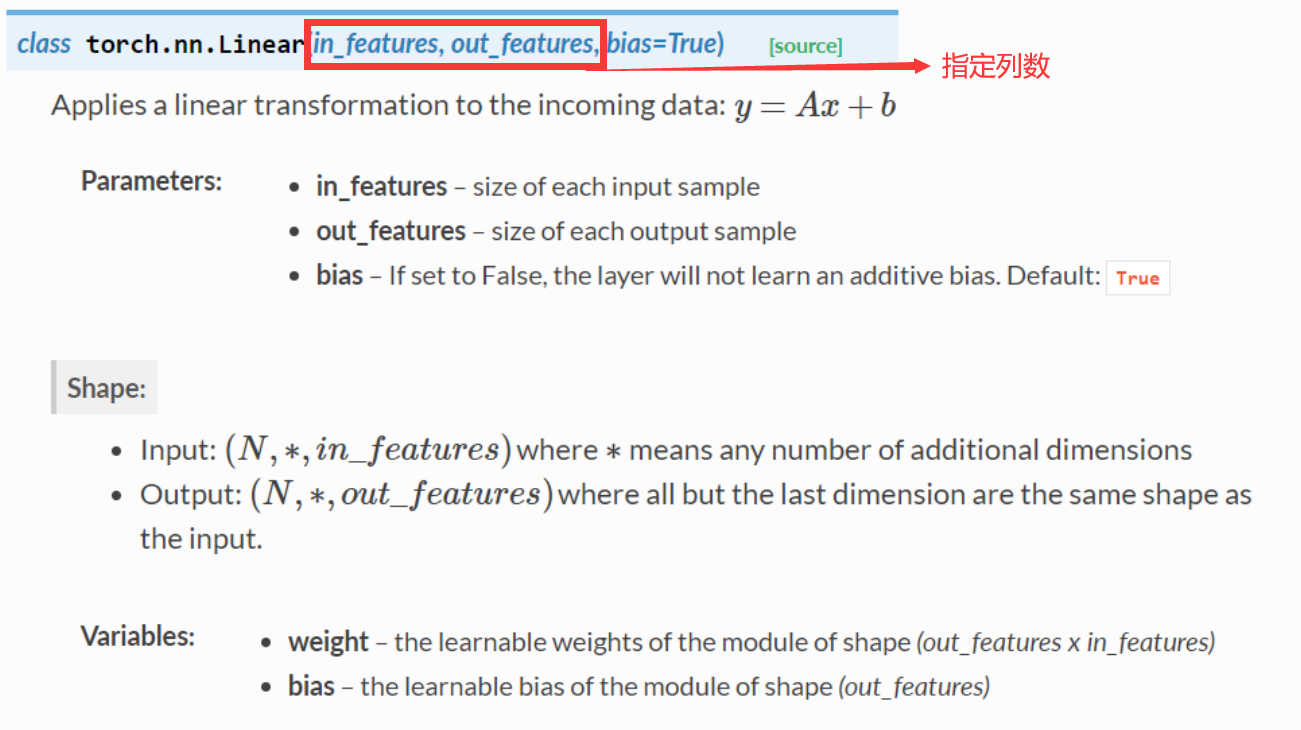

>#### 3. Construct loss and Optimizer
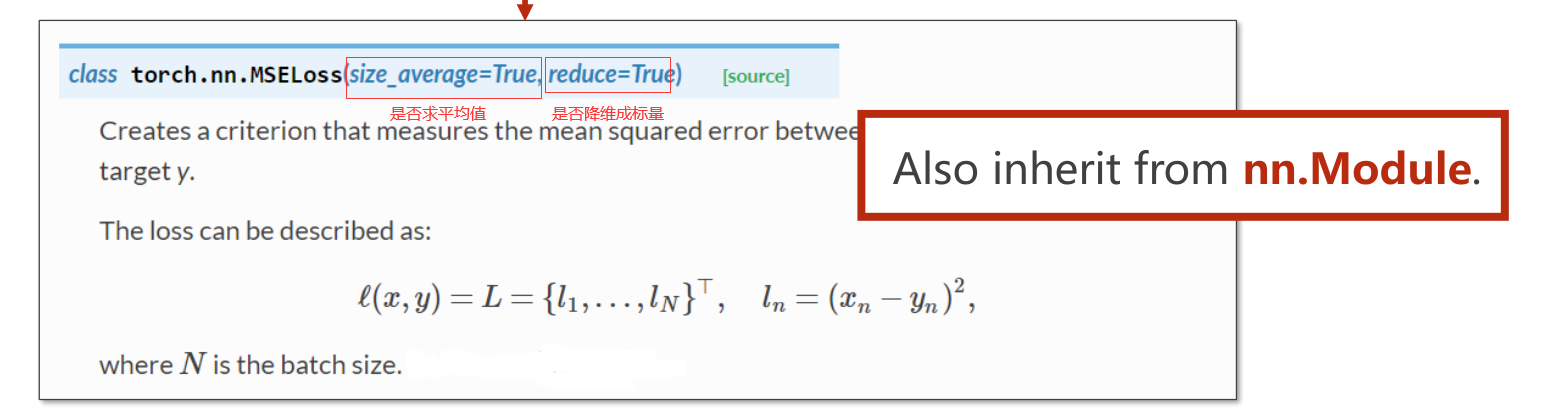

In [6]:
criterion = torch.nn.MSELoss(reduction='sum')

#model.parameters()用于检查模型中所能进行优化的张量
#learningrate(lr)表学习率，可以统一也可以不统一
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

>#### 4. Training Cycle
- 前馈计算预测值与损失函数
- forward前馈计算预测值即损失loss
- 梯度或前文清零并进行backward
- 更新参数

In [9]:
for epoch in range(1000):
    # forward
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    # 打印的时候会自动调用__str__，不会生成计算图
    print(epoch, loss)
    # backward
    # 梯度清零
    optimizer.zero_grad()
    loss.backward()
    # Update
    optimizer.step()

0 tensor(0.0556, grad_fn=<MseLossBackward0>)
1 tensor(0.0548, grad_fn=<MseLossBackward0>)
2 tensor(0.0540, grad_fn=<MseLossBackward0>)
3 tensor(0.0533, grad_fn=<MseLossBackward0>)
4 tensor(0.0525, grad_fn=<MseLossBackward0>)
5 tensor(0.0517, grad_fn=<MseLossBackward0>)
6 tensor(0.0510, grad_fn=<MseLossBackward0>)
7 tensor(0.0503, grad_fn=<MseLossBackward0>)
8 tensor(0.0495, grad_fn=<MseLossBackward0>)
9 tensor(0.0488, grad_fn=<MseLossBackward0>)
10 tensor(0.0481, grad_fn=<MseLossBackward0>)
11 tensor(0.0474, grad_fn=<MseLossBackward0>)
12 tensor(0.0468, grad_fn=<MseLossBackward0>)
13 tensor(0.0461, grad_fn=<MseLossBackward0>)
14 tensor(0.0454, grad_fn=<MseLossBackward0>)
15 tensor(0.0448, grad_fn=<MseLossBackward0>)
16 tensor(0.0441, grad_fn=<MseLossBackward0>)
17 tensor(0.0435, grad_fn=<MseLossBackward0>)
18 tensor(0.0429, grad_fn=<MseLossBackward0>)
19 tensor(0.0422, grad_fn=<MseLossBackward0>)
20 tensor(0.0416, grad_fn=<MseLossBackward0>)
21 tensor(0.0410, grad_fn=<MseLossBackward0>

>#### Test Model

In [10]:
#Output
print('w = ', model.linear.weight.item())
print('b = ', model.linear.bias.item())

#TestModel
x_test = torch.Tensor([[4.0]])
y_test = model(x_test)

print('y_pred = ',y_test.data)

w =  1.999886155128479
b =  0.00025872737751342356
y_pred =  tensor([[7.9998]])
